# RNN

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [40]:
#importing the training set
dataset_training = pd.read_csv('./Google Stock Price/Google_stock_price_train.csv')
training_set = dataset_training.iloc[:,1:2].values
training_set.shape

(1258, 1)

In [8]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)

In [10]:
#Creating a Datastructure with 60 timestamps and 1 output
X_train = []
y_train = []

for i in range(60,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i,:])
    y_train.append(training_set_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
X_train.shape

(1198, 60, 1)

In [13]:
#Reshaping
X_train = np.reshape(X_train,newshape=(X_train.shape[0],X_train.shape[1],1))

In [14]:
#Importing keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
#Intialising the Rnn
regressor = Sequential()

In [17]:
## Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [18]:
## Adding the Second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [19]:
## Adding the Third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [20]:
# Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [21]:
# Adding the output layer
regressor.add(Dense(units=1))

In [22]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 58s 48ms/step - loss: 0.0535
Epoch 2/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014


In [24]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('./Google Stock Price/Google_stock_price_test.csv')
real_stock_price = dataset_test.iloc[:,1:2]

In [41]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_training['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

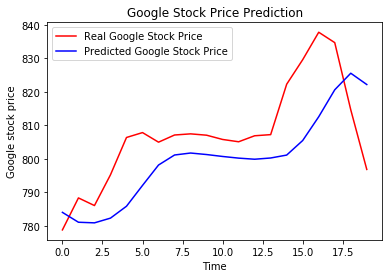

In [42]:
#Visualising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()